In [1]:
# Import dependencies
import pandas as pd
import sqlite3

In [2]:
# Read CSV file
csv_file='Resources/healthcare-dataset-stroke-data.csv'
stroke_df = pd.read_csv(csv_file)
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Drop all Null values
stroke_df = stroke_df.dropna()
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Checking datatypes of columns
stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
# Changed the datatype of age column to int
stroke_df['age']=stroke_df['age'].astype(int)
stroke_df.head()

/Users/sravyamattapalli/opt/anaconda3/envs/pythondata1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
stroke_df.groupby(by=['smoking_status']).count()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,,
Unknown,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483
formerly smoked,837,837,837,837,837,837,837,837,837,837,837
never smoked,1852,1852,1852,1852,1852,1852,1852,1852,1852,1852,1852
smokes,737,737,737,737,737,737,737,737,737,737,737


In [7]:
stroke_df.groupby(by=['work_type']).count()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
work_type,,,,,,,,,,,
Govt_job,630,630,630,630,630,630,630,630,630,630,630
Never_worked,22,22,22,22,22,22,22,22,22,22,22
Private,2811,2811,2811,2811,2811,2811,2811,2811,2811,2811,2811
Self-employed,775,775,775,775,775,775,775,775,775,775,775
children,671,671,671,671,671,671,671,671,671,671,671


In [8]:
stroke_df.groupby(by=['Residence_type']).count()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
Residence_type,,,,,,,,,,,
Rural,2419,2419,2419,2419,2419,2419,2419,2419,2419,2419,2419
Urban,2490,2490,2490,2490,2490,2490,2490,2490,2490,2490,2490


In [9]:
stroke_df.groupby(by=['gender']).count()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Female,2897,2897,2897,2897,2897,2897,2897,2897,2897,2897,2897
Male,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
Other,1,1,1,1,1,1,1,1,1,1,1


In [10]:
stroke_df.loc[stroke_df["work_type"]=='children']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
245,49669,Female,14,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,30669,Male,3,0,0,No,children,Rural,95.12,18.0,Unknown,0
282,33759,Female,3,0,0,No,children,Urban,73.74,16.0,Unknown,0
290,55680,Male,13,0,0,No,children,Urban,114.84,18.3,Unknown,0
291,11014,Male,4,0,0,No,children,Rural,79.17,20.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,0,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,28048,Male,13,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,68598,Male,1,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,579,Male,9,0,0,No,children,Urban,71.88,17.5,Unknown,0


In [11]:
# Making sure id column is unique
stroke_df['id'].nunique()

4909

In [12]:
# final dataset to push into database
stroke_df.to_csv("Resources/cleaned_stroke_data.csv", index=False)


In [12]:
stroke_df.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [20]:
plot_df = stroke_df[["age", "hypertension","heart_disease","avg_glucose_level","bmi"]]
plot_df

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67,0,1,228.69,36.6
2,80,0,1,105.92,32.5
3,49,0,0,171.23,34.4
4,79,1,0,174.12,24.0
5,81,0,0,186.21,29.0
...,...,...,...,...,...
5104,13,0,0,103.08,18.6
5106,81,0,0,125.20,40.0
5107,35,0,0,82.99,30.6
5108,51,0,0,166.29,25.6


/Users/sravyamattapalli/opt/anaconda3/envs/pythondata1/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sravyamattapalli/opt/anaconda3/envs/pythondata1/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sravyamattapalli/opt/anaconda3/envs/pythondata1/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

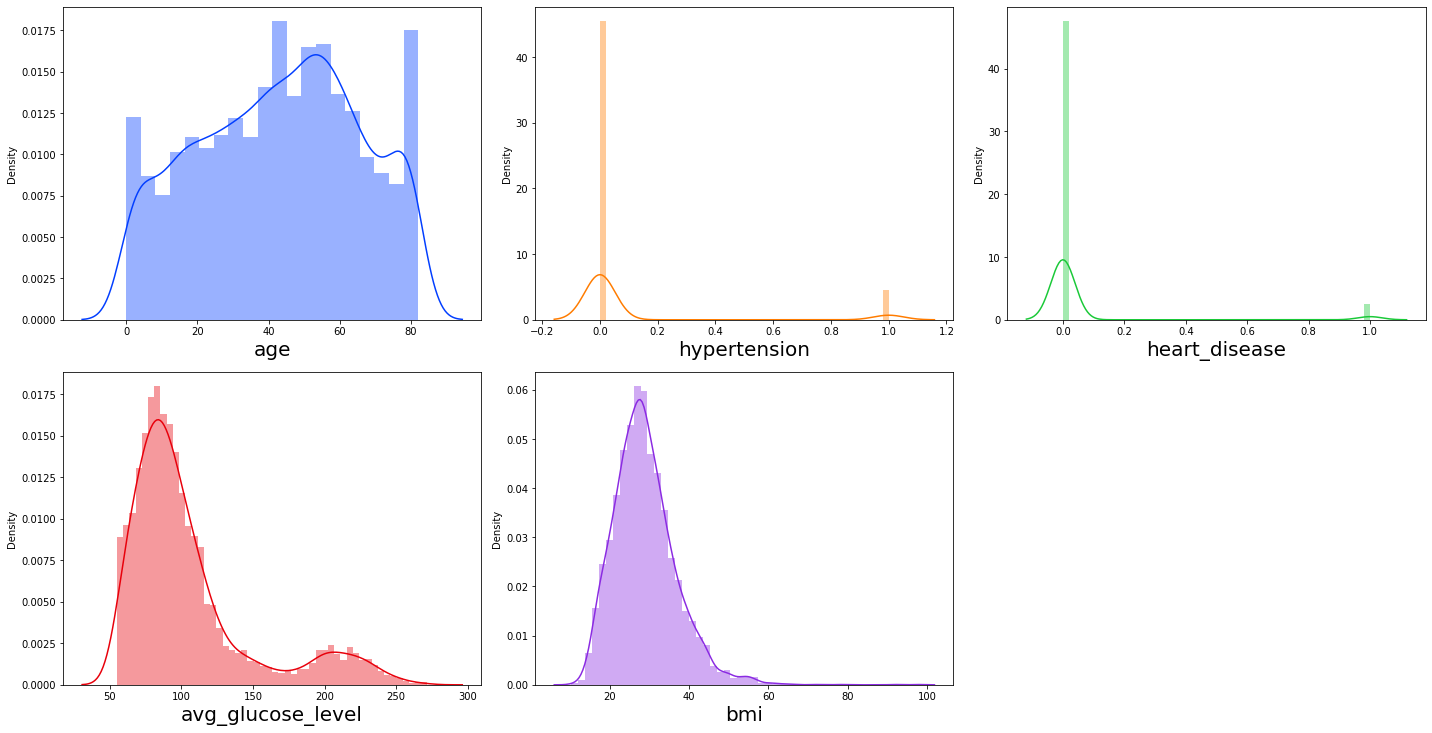

In [42]:
# plot to see how data is distributed for every column
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1
palette = itertools.cycle(sns.color_palette("bright"))

for column in plot_df:
    # color
    c = next(palette)
    if plotnumber<=10:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(plot_df[column],color=c)
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

**Load**

In [14]:
db_locale = 'brain_stroke.db'
conn = sqlite3.connect(db_locale)
c = conn.cursor()

In [15]:
c.execute('''CREATE TABLE stroke(
id INTEGER NOT NULL,
gender VARCHAR(20),
age INTEGER,
hypertension INTEGER,
heart_disease INTEGER,
ever_married VARCHAR(20),
work_type VARCHAR(30),
Residence_type VARCHAR(30),
avg_glucose_level FLOAT,
bmi FLOAT,
smoking_status VARCHAR(30),
stroke INTEGER
)
''')

In [16]:
# Use pandas to load DataFrame into database
stroke_df.to_sql('stroke', conn, if_exists='append', index=False)

In [17]:
# Run select sql query
c.execute('select * from stroke')

In [18]:
# Fetch all records
# as list of tuples
records = c.fetchall()
 
# Display result 
for row in records:
    # show row
    print(row)

(9046, 'Male', 67, 0, 1, 'Yes', 'Private', 'Urban', 228.69, 36.6, 'formerly smoked', 1)
(31112, 'Male', 80, 0, 1, 'Yes', 'Private', 'Rural', 105.92, 32.5, 'never smoked', 1)
(60182, 'Female', 49, 0, 0, 'Yes', 'Private', 'Urban', 171.23, 34.4, 'smokes', 1)
(1665, 'Female', 79, 1, 0, 'Yes', 'Self-employed', 'Rural', 174.12, 24.0, 'never smoked', 1)
(56669, 'Male', 81, 0, 0, 'Yes', 'Private', 'Urban', 186.21, 29.0, 'formerly smoked', 1)
(53882, 'Male', 74, 1, 1, 'Yes', 'Private', 'Rural', 70.09, 27.4, 'never smoked', 1)
(10434, 'Female', 69, 0, 0, 'No', 'Private', 'Urban', 94.39, 22.8, 'never smoked', 1)
(60491, 'Female', 78, 0, 0, 'Yes', 'Private', 'Urban', 58.57, 24.2, 'Unknown', 1)
(12109, 'Female', 81, 1, 0, 'Yes', 'Private', 'Rural', 80.43, 29.7, 'never smoked', 1)
(12095, 'Female', 61, 0, 1, 'Yes', 'Govt_job', 'Rural', 120.46, 36.8, 'smokes', 1)
(12175, 'Female', 54, 0, 0, 'Yes', 'Private', 'Urban', 104.51, 27.3, 'smokes', 1)
(5317, 'Female', 79, 0, 1, 'Yes', 'Private', 'Urban', 214

In [19]:
conn.commit()
conn.close()